### Importing and Analyzing the data 

In [1]:
!pip install tflearn

     |████████████████████████████████| 112kB 14.8MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=205faec841ee5566cd680977438cfa3d7e873c25fd3da5a4fa5e8e447487a28f
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [2]:
import tensorflow as tf
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
X, y = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [4]:
X.shape, y.shape

((1360, 224, 224, 3), (1360,))

### Preprocessing the Data 

In [5]:
X.min(), X.max()

(0.0, 1.0)

In [6]:
y.min(), y.max()

(0, 16)

In [7]:
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y)

In [8]:
y[0], y_onehot[0]

(8, array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

Here, the training data(X) are already normalized, hence no need to scale it.

### Data Visualization 

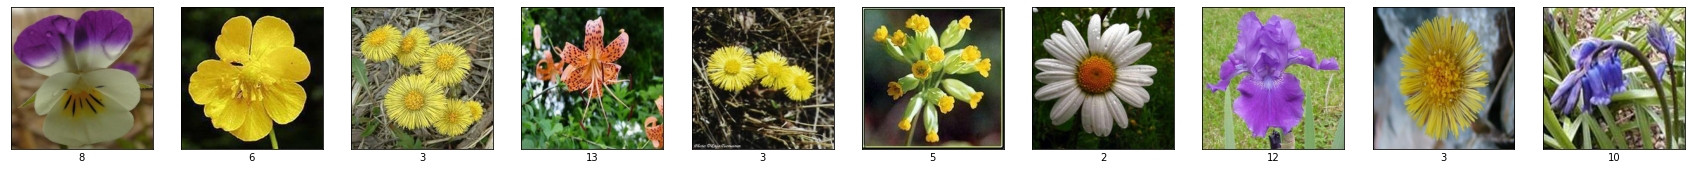

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (30, 25)

for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i])
  plt.xlabel(y[i])

In [10]:
flower_sample = tf.keras.preprocessing.image.array_to_img(X[2])

Label: 3


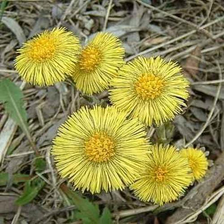

In [11]:
print('Label:', y[2])
flower_sample

In [12]:
import numpy as np
img = np.array(flower_sample)

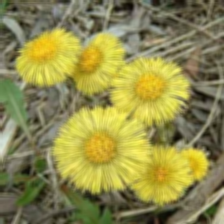

In [13]:
import cv2
ksize = (4, 4)
img_blur = cv2.blur(img, ksize)
tf.keras.preprocessing.image.array_to_img(img_blur)

([], <a list of 0 Text major ticklabel objects>)

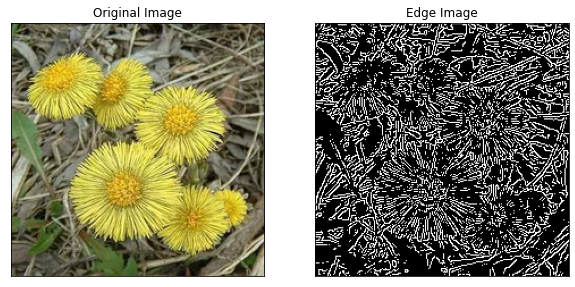

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)

edges = cv2.Canny(img, 200, 200)
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

In [15]:
!ls 17flowers/jpg/7

image_0561.jpg	image_0577.jpg	image_0593.jpg	image_0609.jpg	image_0625.jpg
image_0562.jpg	image_0578.jpg	image_0594.jpg	image_0610.jpg	image_0626.jpg
image_0563.jpg	image_0579.jpg	image_0595.jpg	image_0611.jpg	image_0627.jpg
image_0564.jpg	image_0580.jpg	image_0596.jpg	image_0612.jpg	image_0628.jpg
image_0565.jpg	image_0581.jpg	image_0597.jpg	image_0613.jpg	image_0629.jpg
image_0566.jpg	image_0582.jpg	image_0598.jpg	image_0614.jpg	image_0630.jpg
image_0567.jpg	image_0583.jpg	image_0599.jpg	image_0615.jpg	image_0631.jpg
image_0568.jpg	image_0584.jpg	image_0600.jpg	image_0616.jpg	image_0632.jpg
image_0569.jpg	image_0585.jpg	image_0601.jpg	image_0617.jpg	image_0633.jpg
image_0570.jpg	image_0586.jpg	image_0602.jpg	image_0618.jpg	image_0634.jpg
image_0571.jpg	image_0587.jpg	image_0603.jpg	image_0619.jpg	image_0635.jpg
image_0572.jpg	image_0588.jpg	image_0604.jpg	image_0620.jpg	image_0636.jpg
image_0573.jpg	image_0589.jpg	image_0605.jpg	image_0621.jpg	image_0637.jpg
image_0574.jpg	image_0590

In [16]:
img_load = tf.keras.preprocessing.image.load_img('17flowers/jpg/7/image_0561.jpg')

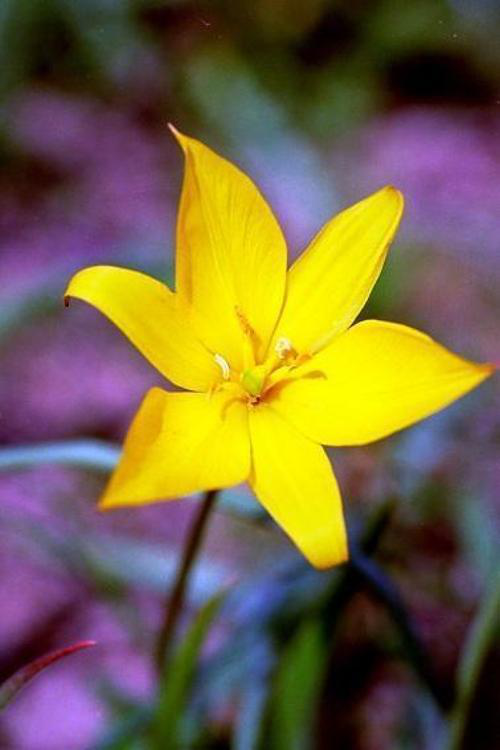

In [17]:
img_load

In [18]:
from PIL import ImageFilter
sharpened1 = img_load.filter(ImageFilter.SHARPEN)

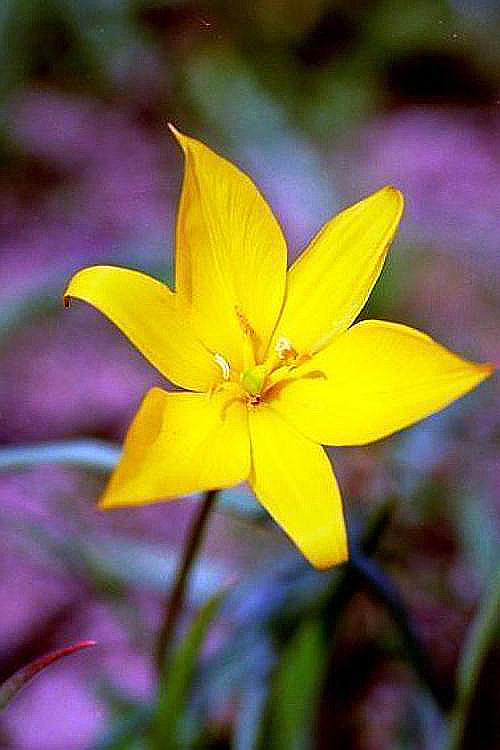

In [19]:
sharpened1.filter(ImageFilter.SHARPEN)

In [20]:
X.shape, y.shape

((1360, 224, 224, 3), (1360,))

In [21]:
X_temp = X.reshape(1360, 224*224*3)

In [22]:
X_temp.shape, y.shape

((1360, 150528), (1360,))

### Train and Testing 

#### Supervised Model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size = 0.1, random_state = 3, stratify = y)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 8, min_samples_split = 3, min_samples_leaf = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
print("Training score:-", dt.score(X_train, y_train))
print("Testing Score:-", dt.score(X_test, y_test))

Training score:- 0.5939542483660131
Testing Score:- 0.2867647058823529


### DL

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [27]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_onehot, random_state = 3, stratify = y_onehot, test_size = 0.1)

#### DNN

In [28]:
tf.keras.backend.clear_session
model = Sequential()

model.add(Flatten(input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dense(150, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu'))

model.add(Dropout(rate = 0.1))
model.add(Dense(17, activation = 'softmax'))

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense (Dense)                (None, 128)               19267712  
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1

In [30]:
model.fit(X_train_dl, y_train_dl, batch_size = 64, epochs = 20, validation_split = 0.1)

Train on 1101 samples, validate on 123 samples
Epoch 1/20
1101/1101 [==============================] - 2s 2ms/sample - loss: 2.8512 - acc: 0.1390 - val_loss: 2.9163 - val_acc: 0.0813
Epoch 2/20
  64/1101 [>.............................] - ETA: 0s - loss: 2.1903 - acc: 0.2812

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1101/1101 [==============================] - 1s 533us/sample - loss: 2.1508 - acc: 0.3243 - val_loss: 2.6801 - val_acc: 0.1057
Epoch 3/20
1101/1101 [==============================] - 1s 523us/sample - loss: 1.7857 - acc: 0.4559 - val_loss: 2.6323 - val_acc: 0.1545
Epoch 4/20
1101/1101 [==============================] - 1s 524us/sample - loss: 1.5315 - acc: 0.5577 - val_loss: 2.5792 - val_acc: 0.2033
Epoch 5/20
1101/1101 [==============================] - 1s 518us/sample - loss: 1.3158 - acc: 0.6213 - val_loss: 2.4582 - val_acc: 0.2033
Epoch 6/20
1101/1101 [==============================] - 1s 511us/sample - loss: 1.0798 - acc: 0.6830 - val_loss: 2.3227 - val_acc: 0.3171
Epoch 7/20
1101/1101 [==============================] - 1s 515us/sample - loss: 0.9280 - acc: 0.7402 - val_loss: 2.1900 - val_acc: 0.3171
Epoch 8/20
1101/1101 [==============================] - 1s 512us/sample - loss: 0.7442 - acc: 0.7920 - val_loss: 2.1229 - val_acc: 0.2764
Epoch 9/20
1101/1101 [=======================

In [31]:
model.evaluate(X_test_dl, y_test_dl)

[2.255392032511094, 0.44117647]

#### CNN

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [33]:
tf.keras.backend.clear_session
model = Sequential()

model.add(BatchNormalization(input_shape = (224, 224, 3)))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(50, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(50, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.1))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(17, activation = 'softmax'))

In [34]:
adam_cnn = tf.keras.optimizers.Adam(lr = 0.0009)
model.compile(optimizer = adam_cnn, loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)       

In [35]:
model.fit(X_train_dl, y_train_dl, epochs = 20, batch_size = 64, validation_split = 0.1)

Train on 1101 samples, validate on 123 samples
Epoch 1/20
1101/1101 [==============================] - ETA: 0s - loss: 2.5890 - acc: 0.1353

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1101/1101 [==============================] - 13s 11ms/sample - loss: 2.5890 - acc: 0.1353 - val_loss: 2.5151 - val_acc: 0.1951
Epoch 2/20
1101/1101 [==============================] - 4s 4ms/sample - loss: 1.9104 - acc: 0.3361 - val_loss: 2.1129 - val_acc: 0.3171
Epoch 3/20
1101/1101 [==============================] - 4s 4ms/sample - loss: 1.5705 - acc: 0.4705 - val_loss: 1.8897 - val_acc: 0.4228
Epoch 4/20
1101/1101 [==============================] - 4s 4ms/sample - loss: 1.4354 - acc: 0.5114 - val_loss: 1.9080 - val_acc: 0.3984
Epoch 5/20
1101/1101 [==============================] - 4s 4ms/sample - loss: 1.1861 - acc: 0.5876 - val_loss: 1.7198 - val_acc: 0.4797
Epoch 6/20
1101/1101 [==============================] - 4s 4ms/sample - loss: 1.0221 - acc: 0.6540 - val_loss: 1.5488 - val_acc: 0.5366
Epoch 7/20
1101/1101 [==============================] - 4s 4ms/sample - loss: 0.8540 - acc: 0.7266 - val_loss: 1.4209 - val_acc: 0.5203
Epoch 8/20
1101/1101 [==============================] - 4

In [36]:
model.evaluate(X_test_dl, y_test_dl)

[1.4564047420726103, 0.6617647]

#### CNN - Transfer Learning

In [37]:
import os
os.listdir('17flowers')

['17flowers.pkl', 'jpg', '17flowers.tgz']

In [38]:
os.chdir('17flowers')

In [39]:
os.listdir('jpg')

['4',
 '10',
 '5',
 '16',
 '9',
 '7',
 '2',
 '11',
 '15',
 'files.txt~',
 '6',
 '3',
 '12',
 '1',
 '14',
 '0',
 '13',
 '8',
 'files.txt']

In [40]:
os.listdir()

['17flowers.pkl', 'jpg', '17flowers.tgz']

In [41]:
class_names = []
for i in range(17):
    class_names.append(str(i))

In [42]:
len(class_names)

17

In [43]:
X_cnn = X
y_cnn = y_onehot

In [44]:
img_size = 224
img_depth = 3

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
def normalize_data(img):
  return tf.keras.applications.vgg16.preprocess_input(img)

In [47]:
train_datagen = ImageDataGenerator(rotation_range = 20,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   horizontal_flip = True,
                                   validation_split = 0.1,
                                   preprocessing_function = normalize_data)

In [48]:
temp_img = tf.keras.preprocessing.image.load_img('jpg/7/image_0618.jpg')

In [49]:
from tensorflow.keras.preprocessing import image

In [50]:
image_array = image.img_to_array(temp_img)

In [51]:
transform_array = train_datagen.random_transform(image_array)
trans_img = image.array_to_img(transform_array)

In [52]:
import matplotlib.pyplot as plt
def plot_images(original_image, updated_image):
  plt.figure(figsize = (8,15))

  #original_image
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(original_image)

  #updated_image
  plt.subplot(1,2,2)
  plt.title('Transformed Image')
  plt.imshow(updated_image)

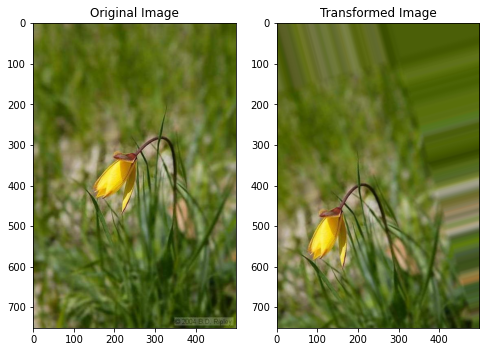

In [53]:
plot_images(temp_img, trans_img)

In [54]:
train_generator = train_datagen.flow_from_directory('jpg',
                                                    target_size = (img_size, img_size),
                                                    subset = 'training',
                                                    batch_size = 32)
test_generator = train_datagen.flow_from_directory('jpg',
                                                   target_size = (img_size, img_size),
                                                   subset = 'validation',
                                                   batch_size = 32)

Found 1224 images belonging to 17 classes.
Found 136 images belonging to 17 classes.


In [55]:
len(X_cnn)

1360

In [56]:
tf.keras.backend.clear_session()
model = tf.keras.applications.VGG16(include_top = False,
                                         input_shape = (img_size, img_size, 3),
                                         weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [57]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [58]:
len(model.layers)

19

In [59]:
for layer in model.layers:
  layer.trainable = False

In [60]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [61]:
x1 = model.output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)
x2

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(?, 512) dtype=float32>

In [62]:
x3 = Dense(128, activation = 'relu', name = "FC")(x2)

In [63]:
prediction = Dense(len(class_names),
                   activation = 'softmax', name = 'Output')(x3)

In [64]:
prediction

<tf.Tensor 'Output/Softmax:0' shape=(?, 17) dtype=float32>

In [65]:
final_model = tf.keras.models.Model(inputs = model.input,
                                    outputs = prediction)

In [66]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('oxflower17_tr.h5',
                                                     save_best_only = True,
                                                     monitor = 'val_acc',
                                                     mode = 'max',
                                                     verbose = 1)

In [67]:
final_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [68]:
final_model.fit(train_generator,
                epochs = 20,
                steps_per_epoch = 1088//32,
                validation_data = test_generator,
                validation_steps = 136//32,
                callbacks = [model_checkpoint])

Epoch 1/20
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 31.2941 - loss: 2.6491 - acc: 0.4192

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_acc improved from -inf to 0.67188, saving model to oxflower17_tr.h5
34/34 [==============================] - 20s 547ms/step - batch: 16.5000 - size: 31.2941 - loss: 2.6491 - acc: 0.4192 - val_loss: 0.9822 - val_acc: 0.6719
Epoch 2/20
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 31.2941 - loss: 0.8891 - acc: 0.7256
Epoch 00002: val_acc improved from 0.67188 to 0.81250, saving model to oxflower17_tr.h5
34/34 [==============================] - 18s 528ms/step - batch: 16.5000 - size: 31.2941 - loss: 0.8891 - acc: 0.7256 - val_loss: 0.5436 - val_acc: 0.8125
Epoch 3/20
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 31.2941 - loss: 0.6677 - acc: 0.7932
Epoch 00003: val_acc improved from 0.81250 to 0.82812, saving model to oxflower17_tr.h5
34/34 [==============================] - 18s 527ms/step - batch: 16.5000 - size: 31.2941 - loss: 0.6677 - acc: 0.7932 - val_loss: 0.5469 - val_acc: 0.8281
Epoch 4/20
34/34 [===========

In [69]:
final_model.fit(train_generator,
                epochs = 30,
                initial_epoch = 20,
                steps_per_epoch = 1088//64,
                validation_data = test_generator,
                validation_steps = 136//64,
                callbacks = [model_checkpoint])

Epoch 21/30
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.0964 - acc: 0.9651
Epoch 00021: val_acc did not improve from 0.94531
17/17 [==============================] - 10s 584ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.0964 - acc: 0.9651 - val_loss: 0.1586 - val_acc: 0.9375
Epoch 22/30
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 30.5882 - loss: 0.1213 - acc: 0.9750
Epoch 00022: val_acc did not improve from 0.94531
17/17 [==============================] - 9s 537ms/step - batch: 8.0000 - size: 30.5882 - loss: 0.1213 - acc: 0.9750 - val_loss: 0.3528 - val_acc: 0.9062
Epoch 23/30
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 30.5882 - loss: 0.0870 - acc: 0.9750
Epoch 00023: val_acc improved from 0.94531 to 0.96875, saving model to oxflower17_tr.h5
17/17 [==============================] - 9s 549ms/step - batch: 8.0000 - size: 30.5882 - loss: 0.0870 - acc: 0.9750 - val_loss: 0.0674 - va

In [70]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16}

### Observation 

Starting with the Supervised model where the have model performed poorly and it's overfitting. This model isn't suitable for this dataset. In fact, with image classification, approaching the Supervised model is not a good idea. Next, go with Deep Neural Network (DNN), where the model has improved the accuracy score slightly. Unfortunately, the black box of Deep Learning's Neural, we can't estimate out the best-hidden layer at an initial stage, because it needs a high amount of time plus calculation. Here, the model is overfitting: training score - 96% and validation score is around 49%. Then move on next model, which is Convolution Neural Network (CNN) which is perfect for image processing. But here, this is the same case as DNN, we didn't get a good score. It needs lots of time and a complex model to get a good score. Finally, to overcome this problem, we've performed the transfer learning with VGG16 on CNN, thus we were able to achieve an excellent result which is 96%, and the model isn't overfitting at all and the losses are almost around the same. Hence for this dataset, CNN + transfer learning is the most suited suggestion.